<a href="https://colab.research.google.com/github/glennamaria/task1/blob/main/Loanprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import numpy as np # linear algebra
import pandas as pd

In [69]:
path="/content/drive/MyDrive/Test data.csv"
test= pd.read_csv(path)
test

,LoanID,LoanAmount,Name,Age,Gender,DPD,MaritalStatus,Employer,FamilyDependants,Loanamount,Tenure,EMI,NetIncome,CIBIL,ChequeBounce,Extent,State,Deliquency,Nil
0,4.313600e+14,200000,SELVAPRAKASH,25,MALE,0,MARRIED,Self Employed Business/Driver,0,200000,36,7795,16000,721,No,5.5CENT,TAMIL NADU,Nil,NaN
1,4.333600e+14,500000,NARMADA BARAL,44,FEMALE,0,MARRIED,Self Employed Business/Driver,0,500000,48,16026,121000,-1,No,15CENT,ODISHA,Nil,NaN
2,4.338000e+14,500000,BIJAYA KUMAR SAHOO,50,MALE,0,MARRIED,Self Employed Business/Driver,0,500000,36,18582,98410,792,No,19.3CENT,ODISHA,Nil,NaN
3,4.123400e+14,400000,HARISH P,25,MALE,0,UNMARRIED,Salaried Professional,2,400000,120,8681,1600,786,No,10.25CENT,KERALA,Nil,NaN
4,4.334500e+14,500000,CHHOTEKUMAR YADAV,38,MALE,0,MARRIED,Self Employed Professional,0,500000,60,13810,27000,-1,No,2.1CENT,BIHAR,Nil,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,4.128400e+14,300000,KOWSHIK GOWDA T S,27,MALE,0,UNMARRIED,Salaried Professional,0,300000,60,8544,291400,777,No,2.75CENT,KARNATAKA,Yes,NaN
1175,4.330400e+14,100000,SHARADA PRASADH PANDA,59,MALE,230,MARRIED,Self Employed Business/Driver,0,100000,36,3871,35000,-1,No,4CENT,ODISHA,Nil,NaN
1176,4.330400e+14,100000,NITYANANDA KANDI,42,MALE,0,MARRIED,Self Employed Business/Driver,0,100000,36,3871,5000,-1,No,12.5CENT,ODISHA,Nil,NaN
1177,4.313600e+14,400000,KAVIYARASI,34,FEMALE,0,MARRIED,Self Employed Business/Driver,0,400000,48,13375,59900,776,No,3.61CENT,TAMIL NADU,Nil,NaN


In [70]:
path="/content/drive/MyDrive/Train data.csv"
train= pd.read_csv(path)
train

,LoanID,LoanAmount,Name,Age,Gender,DPD,MaritalStatus,Employer,FamilyDependants,Loanamount,Tenure,EMI,NetIncome,CIBIL,ChequeBounce,Extent,State,Deliquency
0,4.334500e+14,250000,TUNTUN CHAUDHARY,42,MALE,0,MARRIED,Self Employed Professional,0,250000,36,9809,100000,628,No,3.125DECIMAL,BIHAR,Nil
1,4.330400e+14,250000,BABAJI LENKA,51,MALE,0,MARRIED,Self Employed Business/Driver,0,250000,96,5395,29000,785,No,07CENT,ODISHA,Nil
2,4.347500e+14,400000,RAVADA PRIYA,42,FEMALE,0,MARRIED,Salaried Professional,0,400000,84,9871,23797,769,No,0.93CENT,ANDHRA PRADESH,Nil
3,4.333600e+14,500000,DIPTIMAYEE JENA,31,FEMALE,0,MARRIED,Self Employed Business/Driver,0,500000,36,19486,34400,-1,No,0.09CENT,ODISHA,Nil
4,4.333600e+14,350000,NALINI SEN,35,MALE,23,OTHERS,Self Employed Business/Driver,0,350000,60,9867,-6700,738,No,4CENT,ODISHA,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,4.330400e+14,300000,SANATAN MALIKA,30,FEMALE,336,MARRIED,Salaried Professional,0,300000,120,6406,25000,-1,No,12CENT,ODISHA,Yes
1145,4.128400e+14,350000,PRASANNAKUMARA H S,30,MALE,0,MARRIED,Salaried Professional,0,350000,60,9967,62700,-1,No,3.9CENT,KARNATAKA,Nil
1146,4.128400e+14,750000,RITEESH,33,MALE,0,MARRIED,Salaried Professional,0,750000,108,15263,90200,-1,No,4.17CENT,KARNATAKA,Nil
1147,4.128400e+14,250000,SAMPATH,44,MALE,0,MARRIED,Salaried Professional,0,250000,48,8151,35496,-1,No,0.9CENT,KARNATAKA,Nil


In [71]:

train.shape

(1149, 18)

In [72]:
test.shape

(1179, 19)

In [73]:
print("Columns: ", len(train.columns))

Columns:  18


In [74]:
loan_train_columns = train.columns
loan_train_columns

Index(['LoanID', 'LoanAmount', 'Name', 'Age', 'Gender', 'DPD', 'MaritalStatus',
       'Employer', 'FamilyDependants', 'Loanamount', 'Tenure', 'EMI',
       'NetIncome', 'CIBIL', 'ChequeBounce', 'Extent', 'State', 'Deliquency'],
      dtype='object')

In [75]:
train.describe()

,LoanID,LoanAmount,Age,DPD,FamilyDependants,Loanamount,Tenure,EMI,NetIncome,CIBIL
count,1.149000e+03,1.149000e+03,1149.000000,1149.000000,1149.000000,1.149000e+03,1149.000000,1149.000000,1.149000e+03,1149.000000
mean,4.298001e+14,4.723551e+05,38.699739,42.237598,0.074848,4.736301e+05,66.057441,12619.901654,5.793379e+04,465.471715
std,7.076056e+12,2.820789e+05,9.173198,157.044014,0.372817,2.815262e+05,21.599140,6299.345080,1.180124e+05,354.414247
min,4.123400e+14,3.500000e+04,20.000000,0.000000,0.000000,1.000000e+05,24.000000,1738.000000,-3.720000e+05,-1.000000
25%,4.313600e+14,3.000000e+05,31.000000,0.000000,0.000000,3.000000e+05,60.000000,8630.000000,2.446100e+04,-1.000000
50%,4.330400e+14,4.000000e+05,38.000000,0.000000,0.000000,4.000000e+05,60.000000,11606.000000,4.500000e+04,699.000000
75%,4.333600e+14,5.000000e+05,45.000000,0.000000,0.000000,5.000000e+05,72.000000,14240.000000,6.810000e+04,746.000000
max,4.347900e+14,2.500000e+06,66.000000,1020.000000,4.000000,2.500000e+06,120.000000,52545.000000,3.496800e+06,829.000000


In [76]:
test.describe()

,LoanID,LoanAmount,Age,DPD,FamilyDependants,Loanamount,Tenure,EMI,NetIncome,CIBIL,Nil
count,1.179000e+03,1.179000e+03,1179.000000,1179.000000,1179.000000,1.179000e+03,1179.000000,1179.000000,1.179000e+03,1179.000000,0.0
mean,4.299598e+14,4.833664e+05,38.965225,55.517388,0.079729,4.834385e+05,66.230704,12895.520780,8.015575e+04,481.535199,NaN
std,6.984223e+12,3.193088e+05,9.387325,182.464175,0.391447,3.191806e+05,21.785364,9226.689558,8.548538e+05,348.717039,NaN
min,4.123400e+14,1.000000e+05,19.000000,0.000000,0.000000,1.000000e+05,24.000000,1966.000000,-2.970000e+05,-1.000000,NaN
25%,4.313600e+14,3.000000e+05,31.500000,0.000000,0.000000,3.000000e+05,60.000000,8631.500000,2.624500e+04,-1.000000,NaN
50%,4.330400e+14,4.000000e+05,38.000000,0.000000,0.000000,4.000000e+05,60.000000,11711.000000,4.500000e+04,705.000000,NaN
75%,4.333600e+14,5.000000e+05,45.000000,0.000000,0.000000,5.000000e+05,72.000000,14239.000000,6.995000e+04,750.000000,NaN
max,4.347900e+14,5.000000e+06,67.000000,1055.000000,4.000000,5.000000e+06,120.000000,244816.000000,2.933700e+07,824.000000,NaN


In [77]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149 entries, 0 to 1148
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LoanID            1149 non-null   float64
 1   LoanAmount        1149 non-null   int64  
 2   Name              1149 non-null   object 
 3   Age               1149 non-null   int64  
 4   Gender            1149 non-null   object 
 5   DPD               1149 non-null   int64  
 6   MaritalStatus     1149 non-null   object 
 7   Employer          1143 non-null   object 
 8   FamilyDependants  1149 non-null   int64  
 9   Loanamount        1149 non-null   int64  
 10  Tenure            1149 non-null   int64  
 11  EMI               1149 non-null   int64  
 12  NetIncome         1149 non-null   int64  
 13  CIBIL             1149 non-null   int64  
 14  ChequeBounce      1148 non-null   object 
 15  Extent            1143 non-null   object 
 16  State             1149 non-null   object 


In [78]:
def explore_object_type(df ,feature_name):

    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [79]:
explore_object_type(train, 'Gender')

Gender
MALE      754
FEMALE    395
Name: count, dtype: int64


In [80]:
for featureName in train:
    if train[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(loan_train, str(featureName))


"Name's" Values with count are :
Name
GEETHA                7
SUMATHI               6
MANIKANDAN            6
CHITRA                5
KARTHIKEYAN           5
                     ..
SURENDRA SAHOO        1
SAMIR KUMAR BEHERA    1
JAVARAMMA             1
PARMOD KUMAR SINGH    1
OMANA                 1
Name: count, Length: 2103, dtype: int64

"Gender's" Values with count are :
Gender
MALE      1555
FEMALE     772
Name: count, dtype: int64

"MaritalStatus's" Values with count are :
MaritalStatus
MARRIED      1883
UNMARRIED     276
OTHERS        169
Name: count, dtype: int64

"Employer's" Values with count are :
Employer
Self Employed Business/Driver                     966
Self Employed Professional                        580
Salaried Professional                             465
Student/Homemaker                                 168
Salaried (remittance to bank a/c)                 109
Salaried Professional (remittance to bank a/c)     21
Retired                                           

In [81]:
import missingno as msno

In [82]:
train
train.isna().sum()
# round((loan_train.isna().sum() / len(loan_train)) * 100, 2)

LoanID              0
LoanAmount          0
Name                0
Age                 0
Gender              0
DPD                 0
MaritalStatus       0
Employer            6
FamilyDependants    0
Loanamount          0
Tenure              0
EMI                 0
NetIncome           0
CIBIL               0
ChequeBounce        1
Extent              6
State               0
Deliquency          0
dtype: int64

<Axes: >

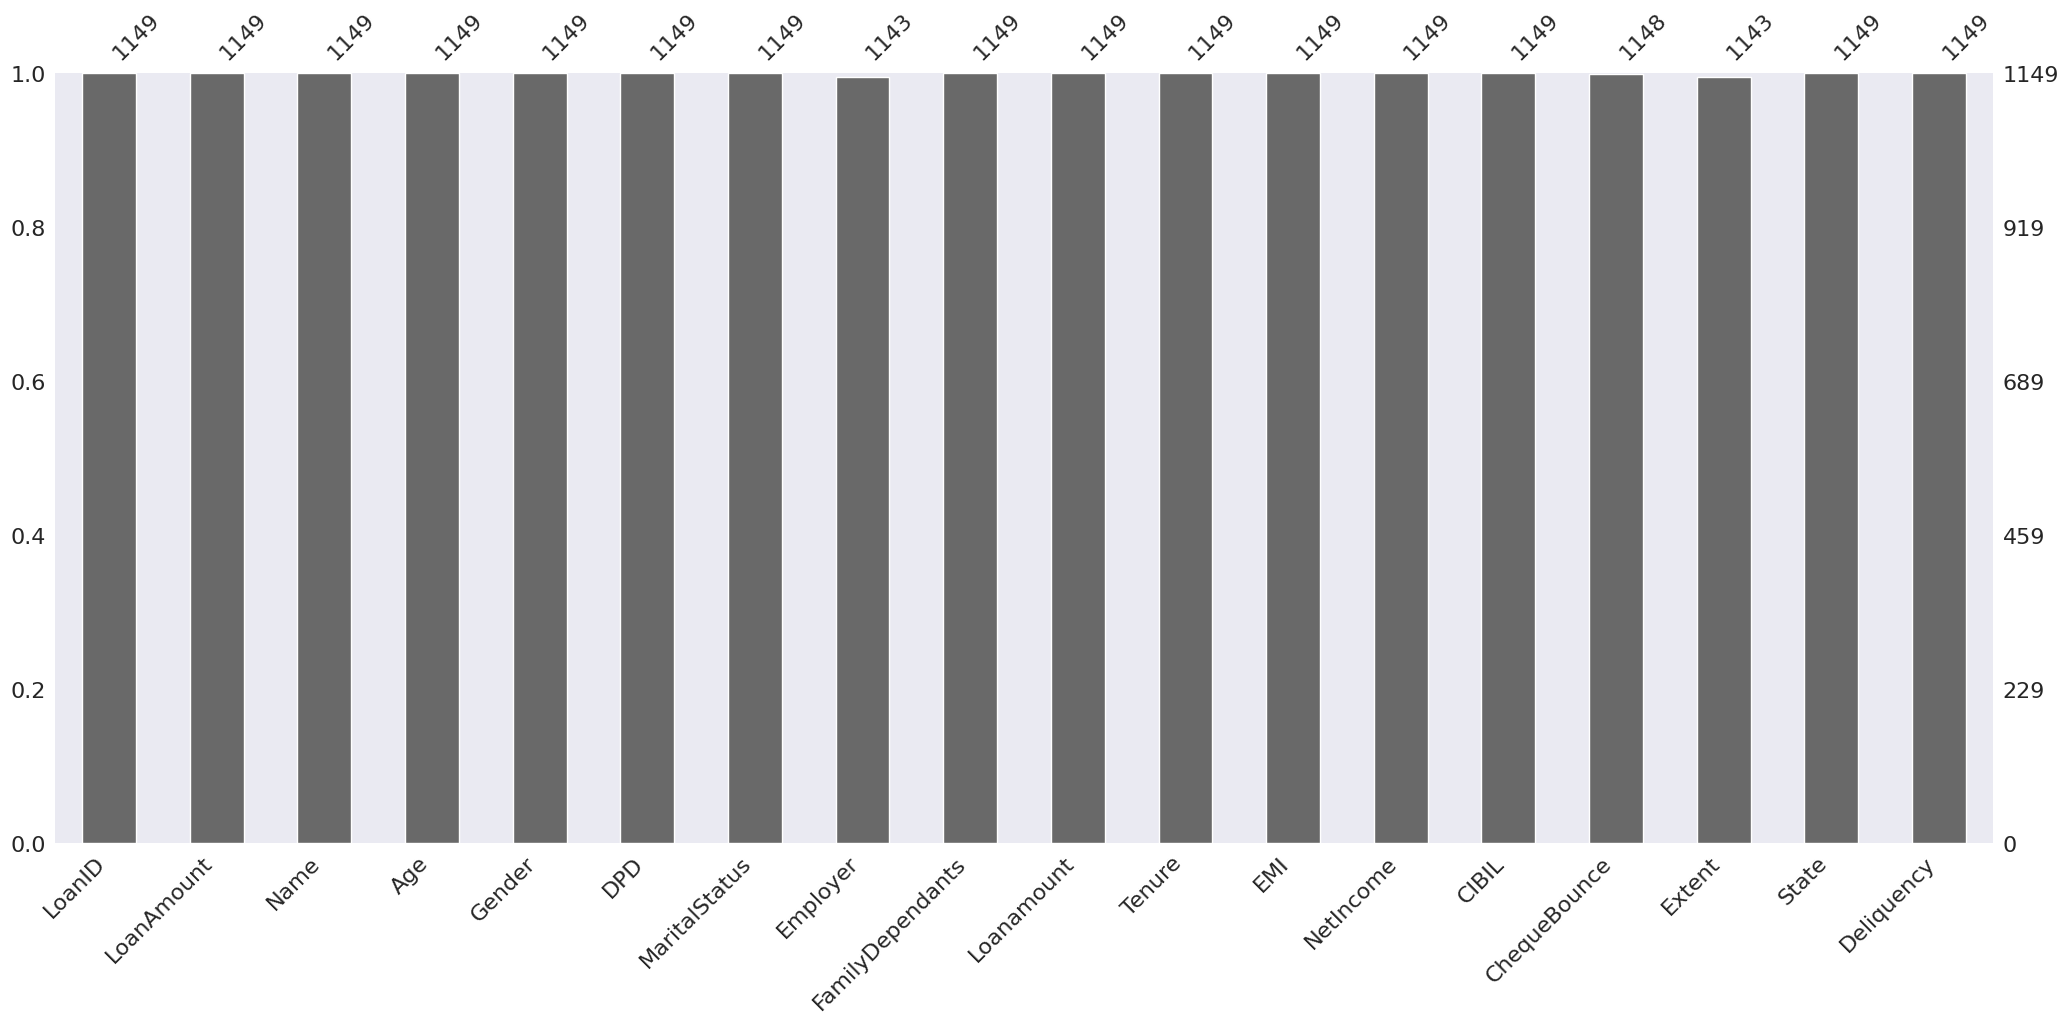

In [83]:
msno.bar(train)

<Axes: >

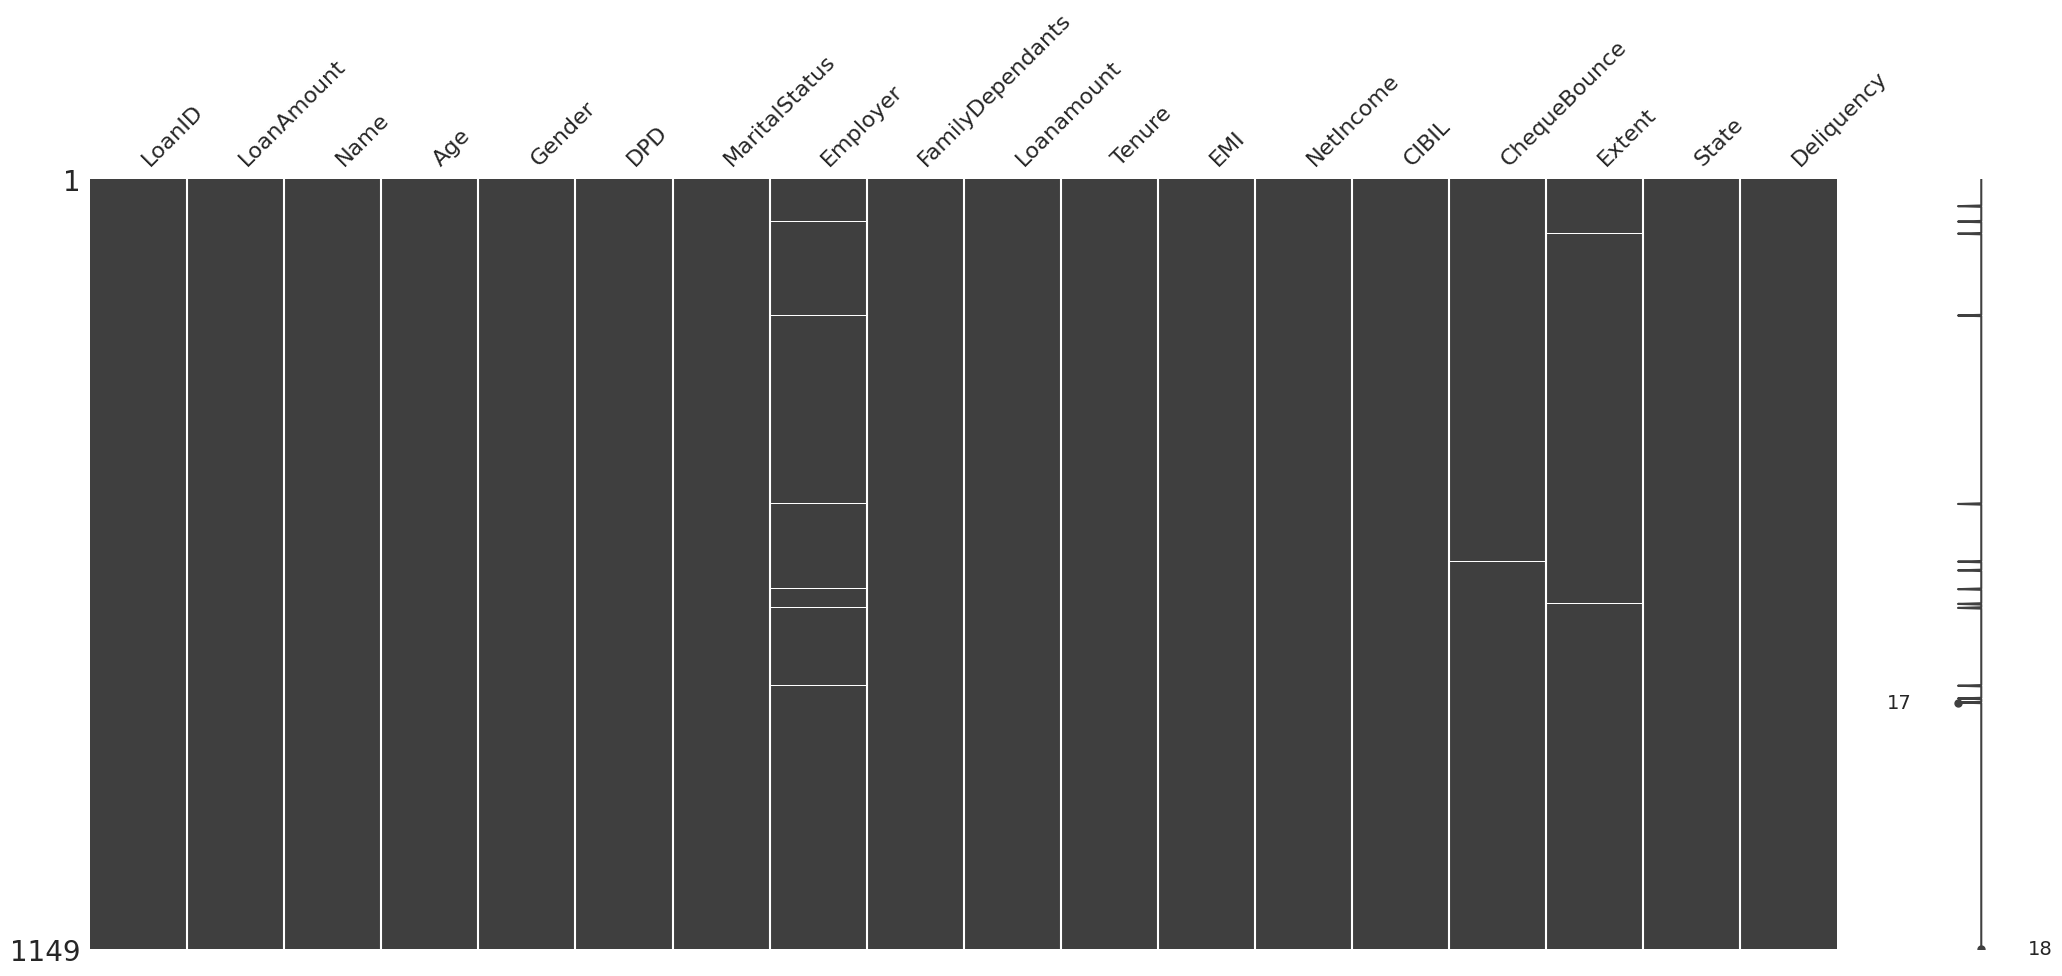

In [84]:
msno.matrix(train )

In [85]:
train['Extent'].fillna(df['Extent'].mode(), inplace=True) # Mode
test['Extent'].fillna(df['Extent'].mode(), inplace=True) # Mode



In [86]:
train.Deliquency = train.Deliquency.replace({"Yes": 1, "N0" : 0})
# loan_test.Loan_Status = loan_test.Loan_Status.replace({"Y": 1, "N" : 0})

train.Gender = train.Gender.replace({"Male": 1, "Female" : 0})
test.Gender = test.Gender.replace({"Male": 1, "Female" : 0})

train.Married = train.MaritalStatus.replace({"OTHERS": 2,"MARRIED": 1, "UNMARRIED" : 0})
test.Married = test.MaritalStatus.replace({"Yes": 1, "No" : 0})

train.ChequeBounce = train.ChequeBounce.replace({"Yes": 1, "No" : 0})
test.ChequeBounce = test.ChequeBounce.replace({"Yes": 1, "No" : 0})

<ipython-input-86-709abe71fc93>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Married = train.MaritalStatus.replace({"OTHERS": 2,"MARRIED": 1, "UNMARRIED" : 0})
<ipython-input-86-709abe71fc93>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Married = test.MaritalStatus.replace({"Yes": 1, "No" : 0})


In [87]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Extent','Employer', 'FamilyDependants']
le = LabelEncoder()
for col in feature_col:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
sns.set_style('dark')

In [89]:
train

,LoanID,LoanAmount,Name,Age,Gender,DPD,MaritalStatus,Employer,FamilyDependants,Loanamount,Tenure,EMI,NetIncome,CIBIL,ChequeBounce,Extent,State,Deliquency
0,4.334500e+14,250000,TUNTUN CHAUDHARY,42,MALE,0,MARRIED,5,0,250000,36,9809,100000,628,0,237,BIHAR,Nil
1,4.330400e+14,250000,BABAJI LENKA,51,MALE,0,MARRIED,4,0,250000,96,5395,29000,785,0,16,ODISHA,Nil
2,4.347500e+14,400000,RAVADA PRIYA,42,FEMALE,0,MARRIED,2,0,400000,84,9871,23797,769,0,7,ANDHRA PRADESH,Nil
3,4.333600e+14,500000,DIPTIMAYEE JENA,31,FEMALE,0,MARRIED,4,0,500000,36,19486,34400,-1,0,3,ODISHA,Nil
4,4.333600e+14,350000,NALINI SEN,35,MALE,23,OTHERS,4,0,350000,60,9867,-6700,738,0,356,ODISHA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,4.330400e+14,300000,SANATAN MALIKA,30,FEMALE,336,MARRIED,2,0,300000,120,6406,25000,-1,0,93,ODISHA,1
1145,4.128400e+14,350000,PRASANNAKUMARA H S,30,MALE,0,MARRIED,2,0,350000,60,9967,62700,-1,0,283,KARNATAKA,Nil
1146,4.128400e+14,750000,RITEESH,33,MALE,0,MARRIED,2,0,750000,108,15263,90200,-1,0,304,KARNATAKA,Nil
1147,4.128400e+14,250000,SAMPATH,44,MALE,0,MARRIED,2,0,250000,48,8151,35496,-1,0,9,KARNATAKA,Nil


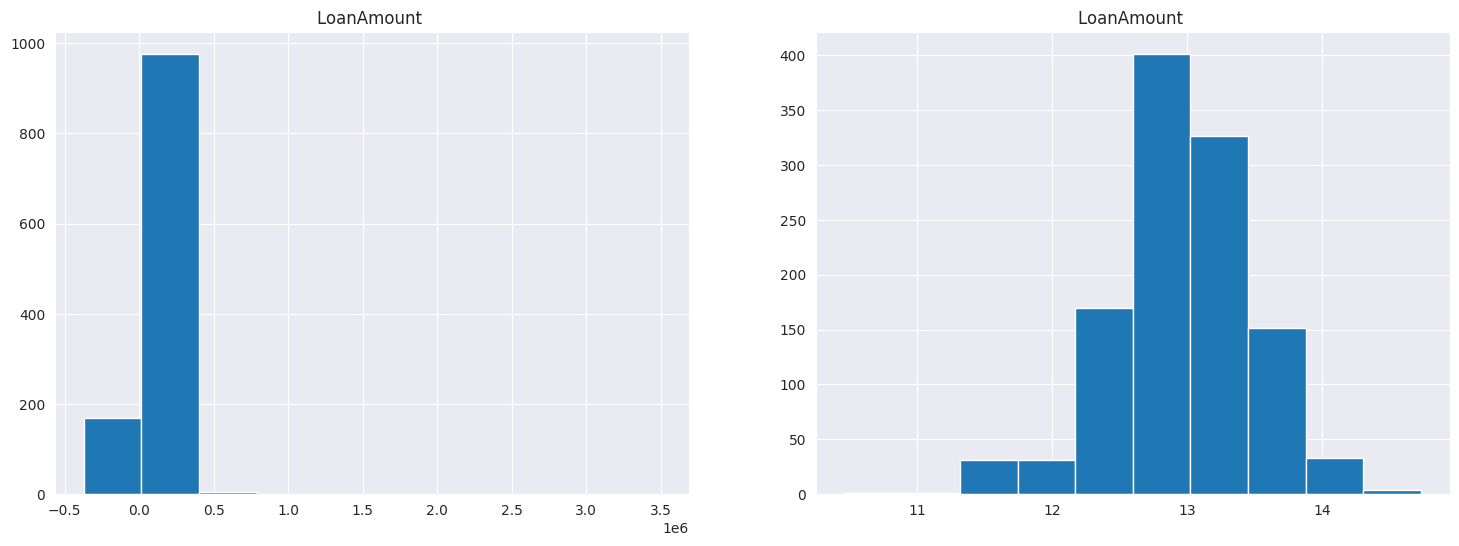

In [90]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


train['NetIncome'].hist(bins=10)
plt.title("LoanAmount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(train['LoanAmount']))
plt.title("LoanAmount ")

plt.show()

In [91]:
train = train.drop(columns=['Name'])

In [93]:

# import ml model from sklearn pacakge

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [ ]:
logistic_model = LogisticRegression()

In [ ]:
train_features = ['CIBIL', 'Employer', 'Gender']

x_train = train[train_features].values
y_train = train['Loan_Status'].values

x_test = test[train_features].values